In [1]:
import pandas as pd
import numpy as np
# %matplotlib notebook 
    ## to enable interactive graphics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML

import csv

# %matplotlib notebook
# plt.interactive(False)

In [18]:
filename = 'result_30.csv'
#df = pd.read_csv(filename)
# convert dataframe
photon_dict = {} # key: photon id, value: list(tuple(x,y,z,E,obj_id))
with open(filename, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(reader)
    for row in reader:
        pid = int(row[0])
        tup = (float(row[1]), float(row[2]), float(row[3]), float(row[4]), int(row[5]))
        if pid in photon_dict:
            photon_dict[pid].append(tup)
        else:
            photon_dict[pid] = [tup]


# Functions

In [3]:
def imageScatter(df, elev = 30, azith = 30):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ='3d')

    plot = ax.scatter3D(df.x, df.y, df.z, c=df.E, cmap='Blues')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


    plt.colorbar(plot, ax=ax)

    #elev = 60 # elevation angle in z plane
    # azith = 120 # azimuth angle in xy plane
    ax.view_init(elev, azith)

    plt.show()

In [4]:
def videoScatter(df):
    fig = plt.figure(figsize = (10, 7))
    ax = fig.add_subplot(111, projection ='3d')

    plot, = ax.plot(df.x, df.y, df.z, 'b.', alpha = 0.2)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


    def init():
        return plot,

    def update(frame):
        ax.view_init(frame/8, frame)
        return plot,

    ani = FuncAnimation(fig, update, frames=np.linspace(0, 360, 360), init_func=init, blit=True, interval=33)
    HTML(ani.to_html5_video())

In [3]:
def plot_slice(photondict, lower, upper, axis1=0, axis2=2, axisslice=1, obj=set()):
    fig, ax = plt.subplots()
    ax.axis('equal')
    points_x = []
    points_y = []
    for events in photondict.values():
        for xyzei in events:
            if xyzei[4] in obj and xyzei[axisslice] < upper and xyzei[axisslice] > lower:
                points_x.append(xyzei[axis1])
                points_y.append(xyzei[axis2])
    ax.scatter(points_x, points_y)
    print("Matched events:", len(points_x))
    plt.show()
    return (points_x, points_y)

In [15]:
def heatmap(xs, ys, bins=50, gamma=0.5):
    fig, ax = plt.subplots()
    ax.axis('square')
    h = ax.hist2d(xs, ys, bins=bins, norm=mcolors.PowerNorm(gamma))
    fig.colorbar(h[3], ax=ax)
    plt.show()

In [4]:
def plot_paths(photondict, axis1=0, axis2=2, obj=set()):
    fig, ax = plt.subplots()
    ax.axis('equal')
    for events in photondict.values():
        objs = {xyzei[4] for xyzei in events}
        points_x = []
        points_y = []
        if obj.issubset(objs):
            for xyzei in events:
                points_x.append(xyzei[axis1])
                points_y.append(xyzei[axis2])
            ax.plot(points_x, points_y)
    plt.show()

# Actual plots

In [23]:
scattereddf = returnScatteredPhotons(df)
withoutSpawning = removeSpawning(scattereddf)

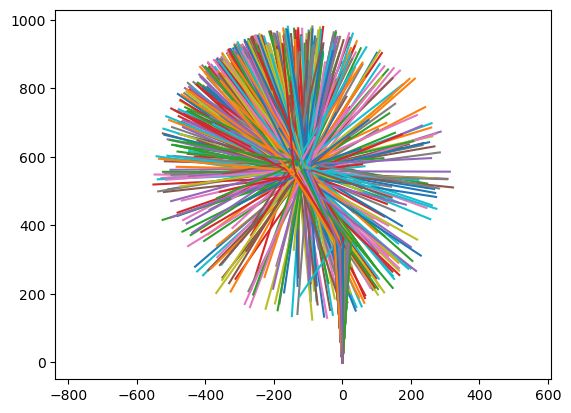

In [10]:
plot_paths(photon_dict, obj={0,1})

Matched events: 2869


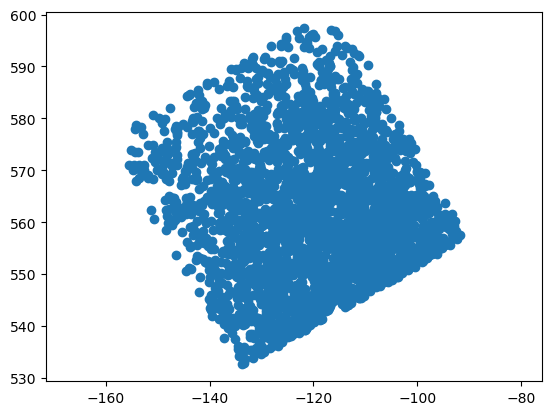

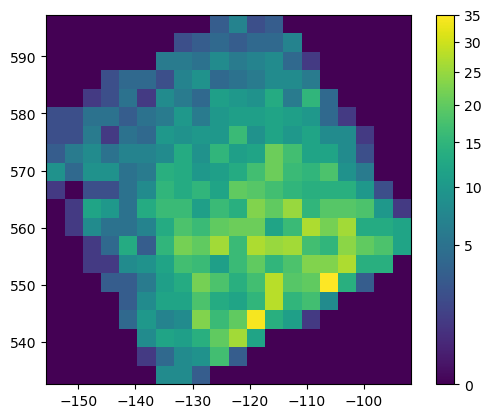

In [17]:
xs, ys = plot_slice(photon_dict, -100, 100, obj=[1])
heatmap(xs, ys, bins=20)